# TASKS

PCA and MNIST

1. Train a neural network on the MNIST training dataset that achieves acceptable performance on the test dataset (>95% accuracy)


2. Decompose the MNIST training dataset into its PCA components
 
 
3. Use the N-best PCA components to make a new testing dataset (using the 10,000 MNIST test images) and make a plot of N vs testing accuracy using the neural network trained in 1) *WITOUT RETRAINING THE NETWORK*
 
 
4. Now using the 100-best PCA components make a new training dataset (using the 60,000 MNIST training images) and retrain your neural network from 1)
 
 
5. Repeat step 3 using your new neural network from 4)
 
 
6. Finally repeat steps 4 and 5 using a network trained with the best 20 components

# Preamble

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from scipy import linalg

mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200

#Useful for debugging problems
print(tf.__version__)

2.3.0


# Task 1 - training NN on MNIST

In [2]:
# Loading MNIST data:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalising pixel values:
train_images=train_images/255.0
test_images=test_images/255.0

In [3]:
# Setting up the network:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'), # 128 neurons in first dense layer
    keras.layers.Dense(10) # 10 neurons in dense output layer
])

# Compiling the model:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

In [4]:
# Training the model:
history=model.fit(train_images, train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3299 - accuracy: 0.9016
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1252 - accuracy: 0.9614
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0947 - accuracy: 0.9714
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0758 - accuracy: 0.9765
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0646 - accuracy: 0.9797
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0533 - accuracy: 0.9832
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0475 - accuracy: 0.9844
Epoch 8/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0398 - accuracy: 0.9867
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0294 - accuracy: 0.9902

In [5]:
# Testing performance:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1170 - accuracy: 0.9774

Test accuracy: 0.977400004863739


# Task 2 - decomposing MNIST training images into PCA components

In [6]:
# Reshaping training images:
print("train_images.shape: ",np.shape(train_images))
X=np.reshape(train_images,(60000,784))
print("X.shape:",np.shape(X))

# Translating data so mean=0:
mu=np.mean(X,axis=0)
x=X-mu

# Creating covariance matrix (rho):
rho=np.cov(x,rowvar=False) 
print("rho.shape:",np.shape(rho))

# Getting eigenvalues and vectors
vals,vecs=linalg.eigh(rho)
#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]

print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))

# Reversing order of elements to get principal component first:
vecs=np.flip(vecs)
vals=np.flip(vals)

train_images.shape:  (60000, 28, 28)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


# Task 3 - making new datasets and testing network created in task 1 on them


In [7]:
# Reshaping and translating test images for processing
Y=np.reshape(test_images,(10000,784))
y=Y-mu

(10000, 28, 28)


Text(0.5, 1.0, '50 PCs')

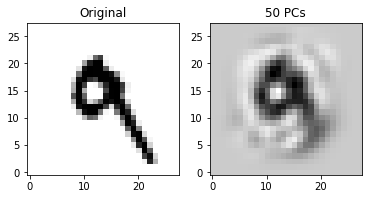

In [8]:
P=np.dot(y,vecs)

# Defining a funciton that makes a new dataset using the MNIST test images and the N best PCA components:

def make_new_data(N):    # N is the number of PCA components being included (from best to worst component)
  new_dataset=(np.dot(P[:,0:N],vecs.T[0:N,:]))+mu
  new_dataset=new_dataset.reshape(10000,28,28)
  return new_dataset

# Checking the function works:
new_test_images_2 = make_new_data(50)
print(new_test_images_2.shape)

fig,ax=plt.subplots(1,2)
ax[0].imshow(np.flipud(np.reshape(Y[7,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[0].set_title('Original')
ax[1].imshow(np.flipud(np.reshape(new_test_images_2[7,:],[28,28])), origin='lower',cmap='binary',interpolation='nearest')
ax[1].set_title('50 PCs')

313/313 - 0s - loss: 4.3621 - accuracy: 0.1108
313/313 - 0s - loss: 3.5584 - accuracy: 0.3284
313/313 - 0s - loss: 1.6012 - accuracy: 0.6574
313/313 - 0s - loss: 0.9114 - accuracy: 0.7907
313/313 - 0s - loss: 0.5244 - accuracy: 0.8821
313/313 - 0s - loss: 0.3643 - accuracy: 0.9209
313/313 - 0s - loss: 0.2783 - accuracy: 0.9386
313/313 - 0s - loss: 0.2259 - accuracy: 0.9517
313/313 - 0s - loss: 0.1961 - accuracy: 0.9589
313/313 - 0s - loss: 0.1766 - accuracy: 0.9624
313/313 - 0s - loss: 0.1716 - accuracy: 0.9650
313/313 - 0s - loss: 0.1651 - accuracy: 0.9671
313/313 - 0s - loss: 0.1548 - accuracy: 0.9688
313/313 - 0s - loss: 0.1477 - accuracy: 0.9702
313/313 - 0s - loss: 0.1405 - accuracy: 0.9709
313/313 - 0s - loss: 0.1369 - accuracy: 0.9717
313/313 - 0s - loss: 0.1329 - accuracy: 0.9737
313/313 - 0s - loss: 0.1318 - accuracy: 0.9733
313/313 - 0s - loss: 0.1280 - accuracy: 0.9752
313/313 - 0s - loss: 0.1272 - accuracy: 0.9754
313/313 - 0s - loss: 0.1264 - accuracy: 0.9757
313/313 - 0s 

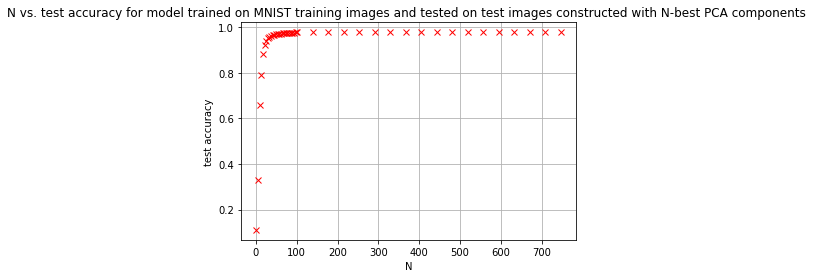

In [9]:
# Setting up an array of N values:
N_array=np.append(np.arange(1,101,4),np.arange(101,785,38))

# Setting up a figure:
fig,ax=plt.subplots()

# For each N, create new testing datasets, test network from task1 and plot N vs test accuracy
for N in N_array:
  #make new images:
  new_images=make_new_data(N)
  #test:
  test_loss, test_acc = model.evaluate(new_images,  test_labels, verbose=2)
  #plot:
  ax.plot(N,test_acc,'rx')
  ax.set_xlabel("N")
  ax.set_ylabel("test accuracy")
  ax.set_title('N vs. test accuracy for model trained on MNIST training images and tested on test images constructed with N-best PCA components ')
  ax.grid()


# Task 4 - retraining network on new dataset made by using 100 best PCA components to reconstruct MNIST training images 

In [10]:
# Making new dataset using 100 best PCA components to reconstruct MNIST training images:

Q=np.dot(x,vecs)

new_train_images_100PCs=(np.dot(Q[:,0:100],vecs.T[0:100,:]))+mu
new_train_images_100PCs=new_train_images_100PCs.reshape(60000,28,28)

# Checking shape:
print(np.shape(new_train_images_100PCs))

(60000, 28, 28)


In [11]:
# Retraining network on new dataset:
history=model.fit(new_train_images_100PCs, train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9769
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0619 - accuracy: 0.9811
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0482 - accuracy: 0.9849
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0455 - accuracy: 0.9853
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0396 - accuracy: 0.9874
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0329 - accuracy: 0.9890
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0333 - accuracy: 0.9887
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0287 - accuracy: 0.9903
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9915
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0225 - accuracy: 0.9920

# Task 5 - repeating task 3 using network from task 4

313/313 - 0s - loss: 4.3543 - accuracy: 0.1194
313/313 - 0s - loss: 4.1234 - accuracy: 0.2919
313/313 - 0s - loss: 1.9681 - accuracy: 0.6332
313/313 - 0s - loss: 1.1483 - accuracy: 0.7816
313/313 - 0s - loss: 0.6995 - accuracy: 0.8724
313/313 - 0s - loss: 0.5099 - accuracy: 0.9028
313/313 - 0s - loss: 0.4022 - accuracy: 0.9238
313/313 - 0s - loss: 0.3156 - accuracy: 0.9413
313/313 - 0s - loss: 0.2604 - accuracy: 0.9532
313/313 - 0s - loss: 0.2243 - accuracy: 0.9609
313/313 - 0s - loss: 0.2136 - accuracy: 0.9615
313/313 - 0s - loss: 0.2067 - accuracy: 0.9652
313/313 - 0s - loss: 0.1911 - accuracy: 0.9691
313/313 - 0s - loss: 0.1825 - accuracy: 0.9705
313/313 - 0s - loss: 0.1689 - accuracy: 0.9724
313/313 - 0s - loss: 0.1650 - accuracy: 0.9718
313/313 - 0s - loss: 0.1599 - accuracy: 0.9739
313/313 - 0s - loss: 0.1555 - accuracy: 0.9749
313/313 - 0s - loss: 0.1496 - accuracy: 0.9751
313/313 - 0s - loss: 0.1491 - accuracy: 0.9750
313/313 - 0s - loss: 0.1516 - accuracy: 0.9751
313/313 - 0s 

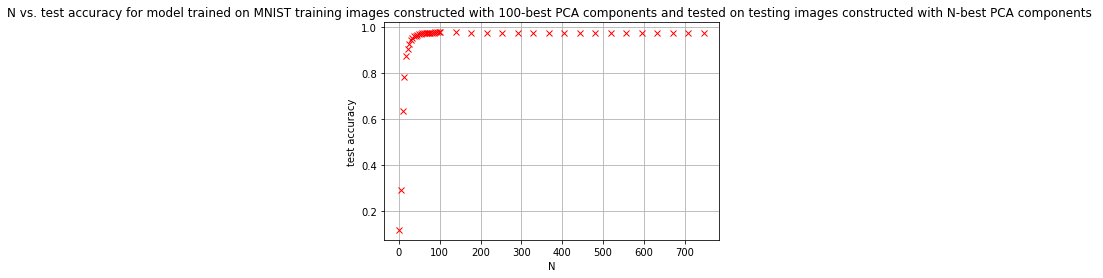

In [12]:
# Setting up an array of N values:
N_array=np.append(np.arange(1,101,4),np.arange(101,785,38))

# Setting up a figure:
fig,ax=plt.subplots()

# For each N, create new testing datasets, test network from task4 and plot N vs test accuracy
for N in N_array:
  #make new images:
  new_images=make_new_data(N)
  #test:
  test_loss, test_acc = model.evaluate(new_images,  test_labels, verbose=2)
  #plot:
  ax.plot(N,test_acc,'rx')
  ax.set_xlabel("N")
  ax.set_ylabel("test accuracy")
  ax.set_title('N vs. test accuracy for model trained on MNIST training images constructed with 100-best PCA components and tested on testing images constructed with N-best PCA components ')
  ax.grid()

# Task 6 - repeating steps 4 and 5 using a network trained with the best 20 components

In [13]:
# Making new dataset using 20 best PCA components to reconstruct MNIST training images:

Q=np.dot(x,vecs)

new_train_images_20PCs=(np.dot(Q[:,0:20],vecs.T[0:20,:]))+mu
new_train_images_20PCs=new_train_images_20PCs.reshape(60000,28,28)

# Checking shape:
print(np.shape(new_train_images_20PCs))

(60000, 28, 28)


In [14]:
# Retraining network on new dataset:
history=model.fit(new_train_images_20PCs, train_labels,batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2720 - accuracy: 0.9323
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1724 - accuracy: 0.9502
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1509 - accuracy: 0.9554
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1378 - accuracy: 0.9595
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1294 - accuracy: 0.9613
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1244 - accuracy: 0.9626
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1195 - accuracy: 0.9637
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1154 - accuracy: 0.9647
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9660
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1122 - accuracy: 0.9660

313/313 - 0s - loss: 4.5422 - accuracy: 0.0975
313/313 - 0s - loss: 3.4255 - accuracy: 0.2622
313/313 - 0s - loss: 1.9074 - accuracy: 0.5370
313/313 - 0s - loss: 0.6314 - accuracy: 0.8111
313/313 - 0s - loss: 0.2971 - accuracy: 0.9173
313/313 - 0s - loss: 0.1497 - accuracy: 0.9599
313/313 - 0s - loss: 0.1587 - accuracy: 0.9605
313/313 - 0s - loss: 0.1664 - accuracy: 0.9597
313/313 - 0s - loss: 0.1691 - accuracy: 0.9576
313/313 - 0s - loss: 0.1793 - accuracy: 0.9592
313/313 - 0s - loss: 0.1832 - accuracy: 0.9582
313/313 - 0s - loss: 0.1855 - accuracy: 0.9584
313/313 - 0s - loss: 0.1867 - accuracy: 0.9600
313/313 - 0s - loss: 0.1825 - accuracy: 0.9607
313/313 - 0s - loss: 0.1826 - accuracy: 0.9598
313/313 - 0s - loss: 0.1799 - accuracy: 0.9600
313/313 - 0s - loss: 0.1820 - accuracy: 0.9589
313/313 - 0s - loss: 0.1818 - accuracy: 0.9595
313/313 - 0s - loss: 0.1839 - accuracy: 0.9580
313/313 - 0s - loss: 0.1847 - accuracy: 0.9575
313/313 - 0s - loss: 0.1850 - accuracy: 0.9577
313/313 - 0s 

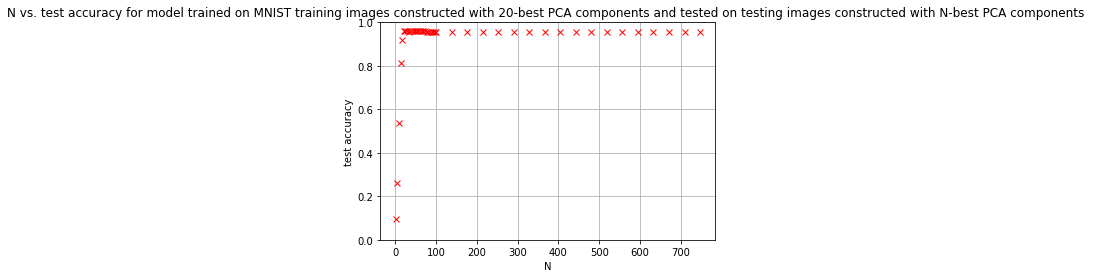

In [15]:
# Setting up an array of N values:
N_array=np.append(np.arange(1,101,4),np.arange(101,785,38))

# Setting up a figure:
fig,ax=plt.subplots()

# For each N, create new testing datasets, test network from task4 and plot N vs test accuracy
for N in N_array:
  #make new images:
  new_images=make_new_data(N)
  #test:
  test_loss, test_acc = model.evaluate(new_images,  test_labels, verbose=2)
  #plot:
  ax.plot(N,test_acc,'rx')
  ax.set_xlabel("N")
  ax.set_ylabel("test accuracy")
  ax.set_title('N vs. test accuracy for model trained on MNIST training images constructed with 20-best PCA components and tested on testing images constructed with N-best PCA components ')
  ax.set_ylim(0,1)
  ax.grid()